In [1]:
import csv
import cv2
import numpy as np
lines = []
with open('../data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
correction = 0.2 ##angle correction to the angle corresponding left and right camera 
for line in lines:
    for i in range(3):
        source_path = line[i]
        filename = source_path.split('\\')[-1]
        current_path = '..\\data\\IMG\\' + filename
        bgr = cv2.imread(current_path)
        image = bgr[...,::-1] # convert the bgr image read from cv2 to rgb format
        images.append(image)
        
        measurement = float(line[3])
        if i==0:
            measurements.append(measurement)
        elif i==1:
            measurements.append(measurement+correction)
        elif i==2:
            measurements.append(measurement-correction)


    


In [2]:
X_train = np.array(images)
y_train = np.array(measurements)

In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import keras
import matplotlib.pyplot as plt
model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (160,320,3)))
model.add(Cropping2D(cropping=((65,30),(0,0))))
model.add(Conv2D(24,(5,5),subsample=(2,2),activation="relu"))
model.add(Conv2D(36,(5,5),subsample=(2,2),activation="relu"))
model.add(Conv2D(48,(5,5),subsample=(2,2),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Dropout(0.5)) # dropout rate set to be 0.5
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
Adam = keras.optimizers.Adam(lr=0.0003)
model.compile(loss='mse',optimizer=Adam)

history_object = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,epochs = 3,verbose = 1)
model.save('model.h5')
print('model saved')


Using TensorFlow backend.
G:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  # Remove the CWD from sys.path while we load stuff.
G:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  # This is added back by InteractiveShellApp.init_path()
G:\Users\Lee\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
  if sys.path[0] == '':


Train on 28176 samples, validate on 7044 samples
Epoch 1/3
28176/28176 [==============================] - 192s 7ms/step - loss: 0.0608 - val_loss: 0.1156
Epoch 2/3
28176/28176 [==============================] - 187s 7ms/step - loss: 0.0512 - val_loss: 0.1020
Epoch 3/3
28176/28176 [==============================] - 187s 7ms/step - loss: 0.0474 - val_loss: 0.1019
model saved


dict_keys(['val_loss', 'loss'])


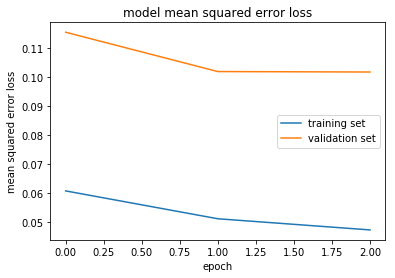

In [4]:
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='right')
plt.show()